In [2]:
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Set three centers ,the model should predict similar results
center_1=np.array([1,1])
center_2=np.array([5,5])
center_3=np.array([8,1])
#generate random data and center it to the three centers
data_1=np.random.randn(200,2)+center_1
data_2=np.random.randn(200,2)+center_2
data_3=np.random.randn(200,2)+center_3

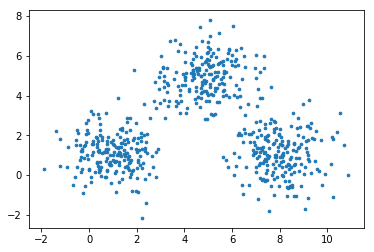

In [4]:
data=np.concatenate((data_1,data_2,data_3),axis=0)

plt.scatter(data[:,0],data[:,1],s=7)

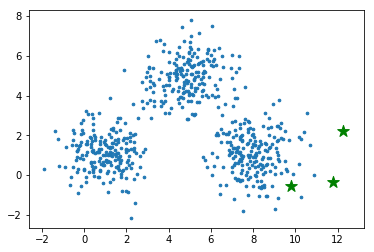

In [5]:

k=3
n=data.shape[0]
c=data.shape[1]
mean=np.mean(data,axis=0)
std=np.std(data,axis=0)
centers=np.random.randn(k,c)*std+mean
plt.scatter(data[:,0],data[:,1],s=7)
plt.scatter(centers[:,0],centers[:,1],marker="*",c='g',s=150)

In [6]:
centers

array([[12.27465224,  2.19862204],
       [ 9.79334106, -0.56459037],
       [11.80254353, -0.34604227]])

In [7]:
centers_old=np.zeros(centers.shape)
centers_new=deepcopy(centers)
data.shape
clusters=np.zeros(n)
distences=np.zeros((n,k))
error=np.linalg.norm(centers_new-centers_old)


In [8]:
np.linalg.norm(centers_new-centers_old)

19.77748965344608

In [9]:
#when after an update the estimate of that centers stay the same  
while error!=0:
   # measure the distence to every center
    for i in range(k):
        distences[:,i]=np.linalg.norm(data-centers[i],axis=1)
        #assign all training data to closet centers
    clusters=np.argmin(distences,axis=1)
    centers_old=deepcopy(centers_new)
    #calculate mean for every clustrs and update the centers
    for i in range(k):
        centers_new[i]=np.mean(data[clusters==i],axis=0)
    error=np.linalg.norm(centers_new-centers_old)
centers_new
        
        

array([[ 6.86946751e+00,  5.26028775e+00],
       [ 4.43793115e+00,  2.08873223e+00],
       [ 1.08803231e+01, -9.49983224e-03]])

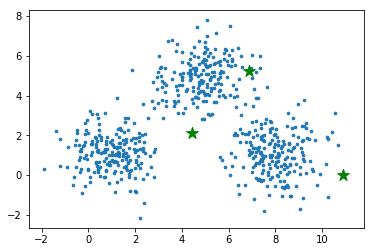

In [10]:
plt.scatter(data[:,0],data[:,1],s=7)
plt.scatter(centers_new[:,0],centers_new[:,1],marker="*",c='g',s=150)